[![AnalyticsDojo](../fig/final-logo.png)](http://rpi.analyticsdojo.com)
<center><h1>Introduction to Python - Introduction to Pandas</h1></center>
<center><h3><a href = 'http://rpi.analyticsdojo.com'>rpi.analyticsdojo.com</a></h3></center>



#### Large sections of this were adopted from Analyzing structured data with Pandas by [Steve Phelps](http://sphelps.net). 


## Introduction to Pandas
- Pandas Overview
- Series Objects
- DataFrame Objects
- Slicing and Filtering
- Examples: Financial Data
- Examples: Iris


## Pandas Overview
- Pandas is object-oriented.

- We create data frames by constructing instances of different classes.

- The two most important classes are:

    - `DataFrame`
    - `Series`
    
- Pandas follows the Java convention of starting the name of classes with an upper-case letter, whereas instances are all lower-case.
- The pandas module is usually imported with the alias `pd`.


In [2]:
import pandas as pd

# Pandas (like the rest of Python) is object-oriented

- Pandas is object-oriented.

- We create data frames by constructing instances of different classes.

- The two most important classes are:

    - `DataFrame`
    - `Series`
    
- Pandas follows the Java convention of starting the name of classes with an upper-case letter, whereas instances are all lower-case.


## Pandas Series
- One-dimensional array 
- Series can be like array, with standard integer index starting at 0
- Series can be dictionary like, with defined index 


In [3]:
data = [1,2,3,4,5] #This creates a list
my_series = pd.Series(data) #array-like pandas series, index created automatically
my_series2 = pd.Series(data, index=['a', 'b', 'c', 'd', 'e'])  #dict like, index specified
print(my_series, '\n', my_series2)

0    1
1    2
2    3
3    4
4    5
dtype: int64 
 a    1
b    2
c    3
d    4
e    5
dtype: int64


In [4]:
my_series2['a']

1

# Plotting a Series

- We can plot a series by invoking the `plot()` method on an instance of a `Series` object.

- The x-axis will autimatically be labelled with the series index.

- This is the first time we are invoking a `magic` command. Read more about them [here](http://ipython.readthedocs.io/en/stable/interactive/magics.html). 

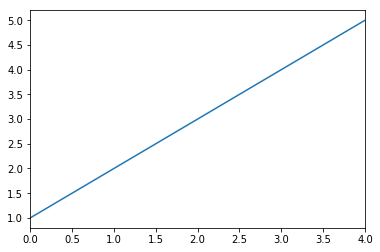

In [5]:
%matplotlib inline
my_series.plot()

# Creating a Series from a `dict`



In [6]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
my_series = pd.Series(d)
my_series

a    0.0
b    1.0
c    2.0
dtype: float64

# Indexing/Slicing a Series with `[]` or . notation

- Series can be accessed using the same syntax as arrays and dicts.
- We use the labels in the index to access each element.
- We can also use the label like an attribute `my_series.b`
- We can specify a range with `my_series[['b', 'c']]`



In [7]:
#Notice the different ways that the parts of the series are specified. 
print( my_series['b'],'\n', my_series.b, '\n', my_series[['b', 'c']])

1.0 
 1.0 
 b    1.0
c    2.0
dtype: float64


## Functions on Series

- We can perform calculations using the entire series similar to numpy.
- Methods are called from within `np.Series`, for example np.Series.add
- See a variety of series functions [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) 



In [8]:
#These are just a variety of examples of operations on series.


starter = {'a' : 0., 'b' : 1., 'c' : 2.}

a = pd.Series(starter)
print('Print the entire array a: \n', a)

b1=10*a
print('Mulitiply by 10 directly:\n', b1)

b2=a.multiply(10)
print('Mulitiply by 10 using the function:\n', b2)

c1=a+b1
print('Add a and b together directly:\n', c1)

c2=pd.Series.add(a,b1) #Note we are calling the method of the series class. Numpy used us np.add
print('Add a and b together with a function:\n', c2)


suma=pd.Series.sum(a) #Note we are calling the method of the series class. Numpy used us np.add
print('sum all of a:\n', suma)


f=a**2  #This squares the value. 
print('square a:\n', f)
x = pd.Series({'a' : 0., 'b' : 1., 'c' : 2.})
y = pd.Series({'a' : 3., 'b' : 4., 'c' : 5.})
z = x+y
print('Add 2 series together:\n', z)

Print the entire array a: 
 a    0.0
b    1.0
c    2.0
dtype: float64
Mulitiply by 10 directly:
 a     0.0
b    10.0
c    20.0
dtype: float64
Mulitiply by 10 using the function:
 a     0.0
b    10.0
c    20.0
dtype: float64
Add a and b together directly:
 a     0.0
b    11.0
c    22.0
dtype: float64
Add a and b together with a function:
 a     0.0
b    11.0
c    22.0
dtype: float64
sum all of a:
 3.0
square a:
 a    0.0
b    1.0
c    4.0
dtype: float64
Add 2 series together:
 a    3.0
b    5.0
c    7.0
dtype: float64


## Time Series
- Time series models link specific times with rows.

In [9]:
dates = pd.date_range('1/1/2000', periods=5)
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq='D')

In [10]:
time_series = pd.Series(data, index=dates)
time_series

2000-01-01    1
2000-01-02    2
2000-01-03    3
2000-01-04    4
2000-01-05    5
Freq: D, dtype: int64

## Plot Time Series
- With a data and a value, the plot command can be used to provide quick visibility in the form of a line graph.

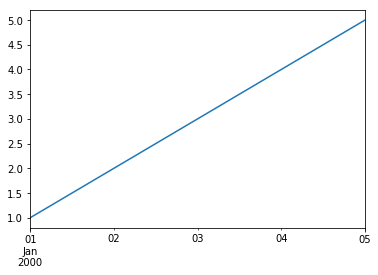

In [11]:
ax = time_series.plot()

In [12]:
type(time_series)

pandas.core.series.Series

In [13]:
time_series

2000-01-01    1
2000-01-02    2
2000-01-03    3
2000-01-04    4
2000-01-05    5
Freq: D, dtype: int64

## DataFrames

- The `pandas` module provides a powerful data-structure called a data frame.

- It is similar, but not identical to:
    - a table in a relational database,
    - an Excel spreadsheet,
    - a dataframe in R.

- A data frame has multiple columns, each of which can hold a *different* type of value.

- Like a series, it has an index which provides a label for each and every row. 


    

## Creating a DataFrame from Outside Data
- Data frames can be read and written to/from:
    - database queries, database tables
    - CSV files
    - json files
    - etc.
    
- Beware that data frames are memory resident;
    - If you read a large amount of data your PC might crash
    - With big data, typically you would read a subset or summary of the data via e.g. a select statement.

## Creating a DataFrame from Python Data Structures

- Data frames can be constructed from other data structures in memory:
    - dict of arrays,
    - dict of lists,
    - dict of dict
    - dict of Series
    - 2-dimensional array
    - a single Series
    - another DataFrame


## Example: Creating a DataFrame from Multiple Series
- Pandas codes missing values as `NaN` rather than `None`
- Series should have matching keys for each matching row.


In [14]:
d = {
        'x' : 
            pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
        'y' : 
            pd.Series([4.,  6., 7.], index=['a',  'c', 'd']),
        'z' :
            pd.Series([0.2, 0.3, 0.4], index=[ 'b', 'c', 'd'])
}

df = pd.DataFrame(d)
print (df)

     x    y    z
a  1.0  4.0  NaN
b  2.0  NaN  0.2
c  3.0  6.0  0.3
d  NaN  7.0  0.4


In [15]:
type(d)

dict

# Plotting DataFrames

- When plotting a data frame, each column is plotted as its own series on the same graph.

- The column names are used to label each series.

- The row names (index) is used to label the x-axis.

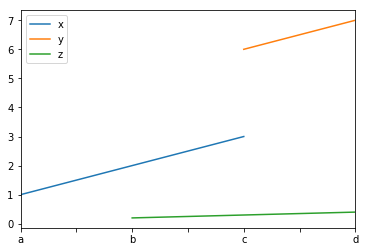

In [16]:
ax = df.plot()

In [17]:
df


,x,y,z
a,1.0,4.0,NaN
b,2.0,NaN,0.2
c,3.0,6.0,0.3
d,NaN,7.0,0.4


## Functions and DataFrames

- We can do calculations and functions with dataframes just like series.
- Functions will typically return a dataframe or a series, depending. 
- To make a copy, don't set two dataframes equal us the `copy` method:  `df2= df.copy()` 

In [18]:
#Info
nulls=df.isnull()
print(nulls, "\n", type(nulls))

nullsum=nulls.sum()

print("\nNull sum for each column \n", nullsum, "\n", type(nullsum))

print("\nWe can slice these results to get the answer for x \n", nullsum.x)
type(nullsum.x)

       x      y      z
a  False  False   True
b  False   True  False
c  False  False  False
d   True  False  False 
 <class 'pandas.core.frame.DataFrame'>

Null sum for each column 
 x    1
y    1
z    1
dtype: int64 
 <class 'pandas.core.series.Series'>

We can slice these results to get the answer for x 
 1


numpy.int64

In [19]:
df2= df.copy()
print(df, '\n', df2)

     x    y    z
a  1.0  4.0  NaN
b  2.0  NaN  0.2
c  3.0  6.0  0.3
d  NaN  7.0  0.4 
      x    y    z
a  1.0  4.0  NaN
b  2.0  NaN  0.2
c  3.0  6.0  0.3
d  NaN  7.0  0.4


In [20]:
df2=df ** 2 #This squares all values. 
print(df2)

     x     y     z
a  1.0  16.0   NaN
b  4.0   NaN  0.04
c  9.0  36.0  0.09
d  NaN  49.0  0.16


## Summary statistics
- To quickly obtain summary statistics on numerical values use the `describe` method.
- You will get a warning if there are missing values.
- The result is itself a DataFrame, that we can slice `dfstats.y['mean']`.

In [21]:
dfstats=df.describe()
dfstats
#type(dfstats)

#END HERE.....

,x,y,z
count,3.0,3.000000,3.00
mean,2.0,5.666667,0.30
std,1.0,1.527525,0.10
min,1.0,4.000000,0.20
25%,1.5,5.000000,0.25
50%,2.0,6.000000,0.30
75%,2.5,6.500000,0.35
max,3.0,7.000000,0.40


In [22]:
xmean = dfstats.x['mean'] #This is the X mean
ystd = dfstats['y']['std'] #This is the Y standardard deviation
print(xmean,'\n',ystd)

2.0 
 1.52752523165


### Data Types
- Each will have an inferred data type. 

In [23]:
print(df.dtypes)

x    float64
y    float64
z    float64
dtype: object


# Accessing the Row and Column Labels

- The row labels (index) can be accessed through `df.index`.
- The column labels can be accessed through `df.columns`.


In [24]:
df.index


Index(['a', 'b', 'c', 'd'], dtype='object')

In [25]:
df.columns

Index(['x', 'y', 'z'], dtype='object')

In [26]:
print(df.describe())

         x         y     z
count  3.0  3.000000  3.00
mean   2.0  5.666667  0.30
std    1.0  1.527525  0.10
min    1.0  4.000000  0.20
25%    1.5  5.000000  0.25
50%    2.0  6.000000  0.30
75%    2.5  6.500000  0.35
max    3.0  7.000000  0.40


## Loading Files with Pandas
- We used Pandas in an earlier notebook to load the iris data file.  
- Whenver you have a dataset with a variety of fields of various types, loading it into Pandas is a good strategy.
- You can load data from Azure, from a local file, or from a url.  







In [31]:
# Pulling from a local file
frame2 = pd.read_csv('../input/iris.csv')
frame2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


##  Large Dataframes - Head and Tail

- Many times you just want a sampling of the available data
- The `head()` command can view the start of a data frame.
- The `tail()` command can be used to show the end of a data frame. 

In [33]:
frame2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
frame2.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [30]:
# Pulling from a url.  Notice that this is the raw version of the file.
frame3 = pd.read_csv("https://raw.githubusercontent.com/AnalyticsDojo/materials/master/analyticsdojo/data/Iris.csv")
frame3.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Indexing/Slicing Rows of DataFrames
- Simple ways of selecting all rows and colu (`df[:]`)
- Rows can be accessed via a key or a integer corresponding to the row number. 
- Omitting a value generally means *all values* before or after an item.
- When we retrieve a single or mulitiple rows, the result is a Dataframe.
- Several ways, either directly, with `iloc`, or with `loc`. (See Examples).
- Read more [here](http://pandas.pydata.org/pandas-docs/stable/indexing.html)



In [34]:
#This is going to create some sample data that we can work with for our analysis. 

import pandas as pd
import numpy as np
 
#Create a dataframe from a random numpy array 
#http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html
df = pd.DataFrame((20+np.random.randn(10, 4)*5),  columns=['a', 'b', 'c', 'd'] )
print (df)
df2 = pd.DataFrame((20+np.random.randn(10, 4)*5),  columns=['e', 'f', 'g', 'h'] )
print (df2)



           a          b          c          d
0  20.846806  15.111059  25.958362  25.592592
1  25.587424  20.707791  15.324753  24.768469
2  32.011188  13.540995  23.695479  29.550432
3  20.326566  26.221344  20.671110  24.484479
4   5.505207  16.426524  20.755172  15.768537
5  25.119967  14.772537  23.061290  16.772735
6  23.132238  26.229085  14.075714  17.171922
7  33.966103  19.714082  17.127761  21.696937
8  19.574993  18.455268  17.094200  19.566525
9  24.514846  17.356722  11.211085  19.838449
           e          f          g          h
0  27.012423  15.834063  17.448095  16.672209
1  20.295859  21.687929  16.596253  13.242686
2  17.161241  18.291791  19.120999  13.788898
3  20.794222  26.125536  26.750723  25.778840
4  22.647943  16.880388  19.580547  22.437458
5  18.385563  14.671903  24.337157  21.855364
6  21.651143  17.810486  20.805939  19.139537
7  24.105045  22.526857  14.052651  12.580153
8  20.513042  19.734665  26.955380  13.558419
9  19.993042  21.780697  15.257169

## Indexing/Slicing Columns of DataFrames
- Simple ways of selecting colum(s) `frame[[colname(s)]]`. 
- Columns can have one (`df['x']`) or multiple (`df[['x', 'y']]`) columns.
- When specifying one column, one can use simplified dot notation `df.x`.
- When we include multiple columns the slice that result is a DataFrame.
- When we retrieve a single column, the result is a Series.
- When we retrieve mulitiple column, the result is a Dataframe.


In [32]:
#Here we can see that there is a similar structure to R, with selecting the desired columns by passing a list.

print (df[['c', 'd']]) #All rows, column c, d
print (df[[ 'c', 'd']]) #All rows, column c, d
print (df.iloc[:,[0,2,3]]) #All rows, column a,c,d
print (df.iloc[:,0:2])     #All rows, column a-b
print (df.iloc[:,[0,2,3]])     #All rows, column 0,2,3
print (df.loc[:,'a':'b']) #All rows, column a-b
print (df.loc[:,['a','c','d']]) #All rows, columns a, c, d



           c          d
0  17.204117  25.159897
1  25.821002  20.632703
2  18.082288  21.870087
3  24.369278  19.458263
4  19.045296  16.042367
5  12.718589  19.218296
6  18.776178  24.633824
7  20.583352  21.085426
8  20.017596  19.721238
9  13.912984  25.596210
           c          d
0  17.204117  25.159897
1  25.821002  20.632703
2  18.082288  21.870087
3  24.369278  19.458263
4  19.045296  16.042367
5  12.718589  19.218296
6  18.776178  24.633824
7  20.583352  21.085426
8  20.017596  19.721238
9  13.912984  25.596210
           a          c          d
0  20.433689  17.204117  25.159897
1  18.406456  25.821002  20.632703
2  17.688657  18.082288  21.870087
3  32.901207  24.369278  19.458263
4  26.017600  19.045296  16.042367
5  22.015985  12.718589  19.218296
6  28.394695  18.776178  24.633824
7  19.921075  20.583352  21.085426
8  20.052721  20.017596  19.721238
9  15.176574  13.912984  25.596210
           a          b
0  20.433689  18.470486
1  18.406456  22.438599
2  17.688657  1

## Dropping Columns from Dataframes
- Done using the `drop` syntax. 
- [Drop Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

In [35]:
#Here, we can remove columns specifically from a dataframe using the drop method.
df2 = pd.DataFrame((20+np.random.randn(10, 4)*5),  columns=['e', 'f', 'g', 'h'] )
print (df2)
df2.drop(['e','f'], inplace=True, axis=1)
print (df2)

           e          f          g          h
0  19.258200  23.017659  25.641860  13.107362
1  22.412277  21.172839  17.792803  17.351913
2  14.718725  23.973071  26.794996  27.041528
3  30.275298  18.921643  19.221306  18.409093
4  22.191922  19.941432  19.289771  20.509603
5  20.322647  22.530420  14.293530  10.585041
6  17.903550  22.262469  24.421396  28.049374
7  16.420767  14.945156   9.737538  13.327748
8  13.271074  24.803354  18.082355  18.133105
9  15.537147  21.585921  20.559789  11.304707
           g          h
0  25.641860  13.107362
1  17.792803  17.351913
2  26.794996  27.041528
3  19.221306  18.409093
4  19.289771  20.509603
5  14.293530  10.585041
6  24.421396  28.049374
7   9.737538  13.327748
8  18.082355  18.133105
9  20.559789  11.304707


## Selecting Rows
- Similarly, we also might want to select out rows, and we can utilize the same syntax.
- [iloc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html)

In [34]:

## Selecting rows
print (df[0:3])     #Select rows 1-3
print (df.iloc[0:3,:])     #Select rows 1-3
print (df.iloc[0:3,])      #Select rows 1-3
print (df.iloc[0:3])       #Select rows 1-3
print (df.iloc[[1,2,4]])   #Select rows 1, 2, and 4


           a          b          c          d
0  20.433689  18.470486  17.204117  25.159897
1  18.406456  22.438599  25.821002  20.632703
2  17.688657  19.641506  18.082288  21.870087
           a          b          c          d
0  20.433689  18.470486  17.204117  25.159897
1  18.406456  22.438599  25.821002  20.632703
2  17.688657  19.641506  18.082288  21.870087
           a          b          c          d
0  20.433689  18.470486  17.204117  25.159897
1  18.406456  22.438599  25.821002  20.632703
2  17.688657  19.641506  18.082288  21.870087
           a          b          c          d
0  20.433689  18.470486  17.204117  25.159897
1  18.406456  22.438599  25.821002  20.632703
2  17.688657  19.641506  18.082288  21.870087
           a          b          c          d
1  18.406456  22.438599  25.821002  20.632703
2  17.688657  19.641506  18.082288  21.870087
4  26.017600  12.656741  19.045296  16.042367


## Intro to Filters (Logical indexing)
- Filters are the selection of rows based on criteria.
- We can select based on specific criteria.
- These criteria can be connected together.
- Most of the time we won't specfically assign selection critia to a list. 

In [35]:
# At the foundation of the filter is a boolean array based on some type of condition. 
print(df)
df['a'] >= 20

           a          b          c          d
0  20.433689  18.470486  17.204117  25.159897
1  18.406456  22.438599  25.821002  20.632703
2  17.688657  19.641506  18.082288  21.870087
3  32.901207  16.485606  24.369278  19.458263
4  26.017600  12.656741  19.045296  16.042367
5  22.015985  17.989679  12.718589  19.218296
6  28.394695  21.860403  18.776178  24.633824
7  19.921075  24.917962  20.583352  21.085426
8  20.052721  11.068475  20.017596  19.721238
9  15.176574  25.349732  13.912984  25.596210


0     True
1    False
2    False
3     True
4     True
5     True
6     True
7    False
8     True
9    False
Name: a, dtype: bool

In [36]:
#notice how the logical statement is inside the dataframe specification.  This creates an intermediate boolean array. 
df[df['a'] >= 20]

,a,b,c,d
0,20.846806,15.111059,25.958362,25.592592
1,25.587424,20.707791,15.324753,24.768469
2,32.011188,13.540995,23.695479,29.550432
3,20.326566,26.221344,20.671110,24.484479
5,25.119967,14.772537,23.061290,16.772735
6,23.132238,26.229085,14.075714,17.171922
7,33.966103,19.714082,17.127761,21.696937
9,24.514846,17.356722,11.211085,19.838449


In [37]:
#This is an alternate method where we first set the boolean array. 
included=df['a'] >= 20
df[included]


,a,b,c,d
0,20.433689,18.470486,17.204117,25.159897
3,32.901207,16.485606,24.369278,19.458263
4,26.017600,12.656741,19.045296,16.042367
5,22.015985,17.989679,12.718589,19.218296
6,28.394695,21.860403,18.776178,24.633824
8,20.052721,11.068475,20.017596,19.721238


In [38]:
#We can now generate a vector based on a critera and then use this for selection
select = df['a']>=20
print (select,type(select))
print (df.loc[select,'a']) #Notice by including only one variable we are selecting rows and all columns.

select2 = (df['a']>20) & (df['c'] < 30)  #More complex criteria
print (select2)
print (df.loc[select2,['a','c']])



0     True
1    False
2    False
3     True
4     True
5     True
6     True
7    False
8     True
9    False
Name: a, dtype: bool <class 'pandas.core.series.Series'>
0    20.433689
3    32.901207
4    26.017600
5    22.015985
6    28.394695
8    20.052721
Name: a, dtype: float64
0     True
1    False
2    False
3     True
4     True
5     True
6     True
7    False
8     True
9    False
dtype: bool
           a          c
0  20.433689  17.204117
3  32.901207  24.369278
4  26.017600  19.045296
5  22.015985  12.718589
6  28.394695  18.776178
8  20.052721  20.017596


In [39]:
#Here we are creating a new variable based on the value of another variable.
df['aboveavg']=0  # We first set the default to 0. 
df.loc[df['a']>=20,'aboveavg']=1 #We then change all rows where a is >=20 to 1.
print(df['aboveavg'])

0    1
1    0
2    0
3    1
4    1
5    1
6    1
7    0
8    1
9    0
Name: aboveavg, dtype: int64


## Joining Dataframes
- Often you need to combine dataframe, 
- either matching columns for the smae rows (column  bind)
- Add rows for the same columns (row bind)

## Stacking Dataframes Vertically
- Adds rows vertially with the `concat` function
- The index is not automatically reset
- In R referred to as a row bind.

In [40]:
#This first generates 2 dataframes. 
df = pd.DataFrame((20+np.random.randn(10, 4)*5),  columns=['a', 'b', 'c', 'd'] )
df2 = pd.DataFrame((20+np.random.randn(10, 4)*5),  columns=['a', 'b', 'c', 'd'] )

#This will stack the 2 dataframes vertically on top of one another
dfbyrow=pd.concat([df, df2])  #This is equivalent to a rowbind in R. 
print (dfbyrow)

           a          b          c          d
0  15.005032  24.226358   9.121983  24.363857
1  27.556025  19.287197  27.573472  28.351025
2  21.985489  13.960642  24.302338   4.584726
3  31.495365  20.478308  17.098913  20.648894
4  12.972037  13.911789  16.452253  13.050833
5  11.425303  17.400112  19.268305  22.898443
6  14.140827  25.677616  26.598400  21.028272
7  22.002136  16.515465  21.279558  24.092701
8  17.357785  26.678202  22.410675  23.871805
9  23.158024  24.506395  23.929505  21.833916
0  29.869447  13.233508  17.402878  16.525828
1  22.665231  13.719858  10.400279  14.153439
2  18.455373  22.015032  28.437001  26.569280
3  15.536898  20.892490  20.095986  31.660166
4  18.673178  15.774329  18.172289  16.647217
5  14.914952  20.683466  17.727510  27.906886
6  15.946385  30.360479  19.574986  14.183644
7  21.657851  18.593217  22.205457  29.838322
8  29.130819  22.629769  24.511310  23.291149
9  24.282911  15.910307  25.360774   9.524692


In [44]:
# View how the index here from df has been reset and incremented while in the earlier example the index was kept. 

addition = df.append(df2)
print(addition )
addition2 = df.append(df, ignore_index=True)
print(addition2 )


           a          b          c          d
0  15.005032  24.226358   9.121983  24.363857
1  27.556025  19.287197  27.573472  28.351025
2  21.985489  13.960642  24.302338   4.584726
3  31.495365  20.478308  17.098913  20.648894
4  12.972037  13.911789  16.452253  13.050833
5  11.425303  17.400112  19.268305  22.898443
6  14.140827  25.677616  26.598400  21.028272
7  22.002136  16.515465  21.279558  24.092701
8  17.357785  26.678202  22.410675  23.871805
9  23.158024  24.506395  23.929505  21.833916
0  29.869447  13.233508  17.402878  16.525828
1  22.665231  13.719858  10.400279  14.153439
2  18.455373  22.015032  28.437001  26.569280
3  15.536898  20.892490  20.095986  31.660166
4  18.673178  15.774329  18.172289  16.647217
5  14.914952  20.683466  17.727510  27.906886
6  15.946385  30.360479  19.574986  14.183644
7  21.657851  18.593217  22.205457  29.838322
8  29.130819  22.629769  24.511310  23.291149
9  24.282911  15.910307  25.360774   9.524692
            a          b          

## Inner/Outer Joins Dataframes
- Adds rows vertially with the `concat` function
- In R referred to as a column bind.
- Can do the equivalent of an inner and outer join.

In [45]:
#Merging additional columns also uses the concat function 
#This is equavalent to an inner join in SQL.
df = pd.DataFrame((20+np.random.randn(10, 4)*5),  columns=['a', 'b', 'c', 'd'] )
df4 = pd.DataFrame((20+np.random.randn(10, 4)*5),  columns=['e', 'f', 'g', 'h'] )


dfbycolumns = pd.concat([df, df4], axis=1, join='inner')
dfbycolumns

,a,b,c,d,e,f,g,h
0,22.576089,28.891630,15.353601,25.901426,15.157179,21.600749,12.550956,19.340090
1,19.916053,20.738753,14.188645,23.066358,18.433608,30.986049,20.177837,14.238396
2,16.637782,28.420187,8.431636,6.891703,19.901526,22.138572,15.709735,18.793604
3,21.011992,24.601372,23.614723,26.645414,12.349805,23.212745,18.726439,20.285173
4,22.113504,24.738917,17.097496,22.976456,21.247337,13.963175,23.880419,20.475069
5,18.541721,19.655908,23.478497,27.833214,26.568688,17.837682,16.194940,10.892419
6,7.919420,22.811560,21.984802,23.355093,17.841957,14.355126,19.694069,22.447565
7,14.980497,24.932561,6.246808,30.388961,19.816534,23.267422,27.035381,18.800882
8,19.470926,25.567395,16.673980,23.750920,23.829163,19.539769,22.768301,26.327384
9,20.504794,12.702171,22.907290,21.884356,21.070830,21.713158,10.132253,17.666635


In [21]:
#Here we are generating a small dataframe to be used in merging so you can see the differences in specifying inner & outer, 
shortdf=df[0:5]
dfbycolumns = pd.concat([df, shortdf], axis=1, join='inner')
dfbycolumns

,a,b,c,d,a,b,c,d
0,22.670530,18.996459,12.463951,14.839156,22.670530,18.996459,12.463951,14.839156
1,23.558752,15.928566,11.986471,20.335631,23.558752,15.928566,11.986471,20.335631
2,11.203021,10.407740,23.439590,25.218912,11.203021,10.407740,23.439590,25.218912
3,25.840799,20.822052,28.692540,15.926188,25.840799,20.822052,28.692540,15.926188
4,21.397606,11.704401,19.169834,27.919349,21.397606,11.704401,19.169834,27.919349


In [46]:
#Here, the outer does the equivalent of a left outer join for this dataset. 
shortdf=df[0:5]
dfbycolumns = pd.concat([df, shortdf], axis=1, join='outer')
dfbycolumns

,a,b,c,d,a,b,c,d
0,22.576089,28.891630,15.353601,25.901426,22.576089,28.891630,15.353601,25.901426
1,19.916053,20.738753,14.188645,23.066358,19.916053,20.738753,14.188645,23.066358
2,16.637782,28.420187,8.431636,6.891703,16.637782,28.420187,8.431636,6.891703
3,21.011992,24.601372,23.614723,26.645414,21.011992,24.601372,23.614723,26.645414
4,22.113504,24.738917,17.097496,22.976456,22.113504,24.738917,17.097496,22.976456
5,18.541721,19.655908,23.478497,27.833214,NaN,NaN,NaN,NaN
6,7.919420,22.811560,21.984802,23.355093,NaN,NaN,NaN,NaN
7,14.980497,24.932561,6.246808,30.388961,NaN,NaN,NaN,NaN
8,19.470926,25.567395,16.673980,23.750920,NaN,NaN,NaN,NaN
9,20.504794,12.702171,22.907290,21.884356,NaN,NaN,NaN,NaN


Copyright [AnalyticsDojo](http://rpi.analyticsdojo.com) 2016.
This work is licensed under the [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/) license agreement.

## CREDITS

#### Large sections of this were adopted from Analysing structured data with Pandas by [Steve Phelps](http://sphelps.net).  Thanks Steve!


Copyright [AnalyticsDojo](http://rpi.analyticsdojo.com) 2016
This work is licensed under the [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/) license agreement.

